In [3]:
# !pip install fitter
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions
import scipy.stats as stats

# Fitter python package was used to find the best fitting distribution in terms of the RSS error of potential fits (lognormal found to be best)
# In practice, recent retrievals would be compared to the distribution and filtered based on a set threshold
# of 99th percentile to identify them as outliers. From this, further analysis would be done using the downscaling model, MODIS verification and finally
# thresholding at 99th percentile of the pixel values to identify the most thermally active regions of the region of interest. If these lie within 
# bounding areas/ key building interest, it's importance would be flagged accordingly.

path = "D:\Dissertation-2542000\RP3\Thermal\landsattabledata_updated.xlsx"
df = pd.read_excel(path)
vals = df['diff_from_mean'].values


# f = Fitter(df,
#            distributions= get_common_distributions())
# f.fit()
# lognorm_params = f.fitted_param['lognorm']  # returns (s, loc, scale)

# s, loc, scale = lognorm_params

# # Now compute the 99th percentile using scipy
# percentile_99 = stats.lognorm.ppf(0.99, s=s, loc=loc, scale=scale)

# print("Lognorm 99th percentile:", percentile_99)


log_vals = np.log(vals[vals > 0])  # Only positive values
mean_val = np.mean(vals)
std_val = np.std(vals)
min_val = np.min(vals)
max_val = np.max(vals)
mu = np.mean(log_vals)
sigma = np.std(log_vals)
threshold_99 = np.percentile(vals, 99)
print("Empirical 99th percentile:", threshold_99)


# Now get the 99th percentile from the fitted lognormal
percentile_99 = stats.lognorm.ppf(0.99, s=sigma, scale=np.exp(mu))
print("Lognorm 99th percentile (aligned with MATLAB):", percentile_99)
print("Mean of log values:", mu)
print("Standard deviation of log values:", sigma)
print("Mean of original values:", mean_val)
print("Standard deviation of original values:", std_val)
print("Min of original values:", min_val)
print("Max of original values:", max_val)

Empirical 99th percentile: 13.457507515038166
Lognorm 99th percentile (aligned with MATLAB): 15.557666405035581
Mean of log values: 2.1853152978313486
Standard deviation of log values: 0.24039321115412124
Mean of original values: 9.132427023675223
Standard deviation of original values: 1.9765874664494512
Min of original values: 3.9349524662860293
Max of original values: 13.457507515038166


         sumsquare_error         aic         bic  kl_div  ks_statistic  \
cauchy          5.436499  579.612581  583.733467     inf      0.093186   
norm            5.481287  522.329349  526.450235     inf      0.101335   
lognorm         5.481288  524.330084  530.511413     inf      0.101335   
gamma           5.484946  524.677209  530.858538     inf      0.101494   
chi2            5.488318  525.809426  531.990755     inf      0.103169   

         ks_pvalue  
cauchy    0.660457  
norm      0.556341  
lognorm   0.556340  
gamma     0.554349  
chi2      0.533523  
Best fit: {'cauchy': {'loc': 9.168950006026032, 'scale': 1.031780599856077}}
99th percentile for best distribution (cauchy): 42.000741044540916


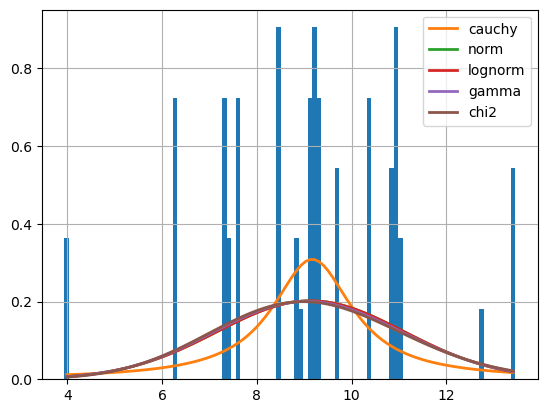

In [ ]:
### No using cauchy distribution as it is not suitable for this analysis(Just use this block as a reference)



# !pip install fitter
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions
import scipy.stats as stats

# === Load the data ===
path = "D:\Dissertation-2542000\RP3\Thermal\landsattabledata_updated.xlsx"
df = pd.read_excel(path)
df = df['diff_from_mean'].values

# === Fit common distributions ===
f = Fitter(df, distributions=get_common_distributions())
f.fit()

# === Show fit summary ===
print(f.summary())

# === Get best fitting distribution ===
best = f.get_best(method='sumsquare_error')
print("Best fit:", best)

# === Extract distribution name and parameters ===
dist_name = list(best.keys())[0]
params = best[dist_name]

# === Access scipy's distribution object ===
distribution = getattr(stats, dist_name)

# === Prepare shape, loc, scale ===
shape_names = distribution.shapes.split(', ') if distribution.shapes else []
shape_params = [params[p] for p in shape_names] if shape_names else []

loc = params.get('loc', 0)
scale = params.get('scale', 1)

# === Compute the 99th percentile ===
percentile_value = distribution.ppf(0.99, *shape_params, loc=loc, scale=scale)
print(f"99th percentile for best distribution ({dist_name}): {percentile_value}")


95% CI for 99th percentile threshold: 4.71 – 5.53 °C


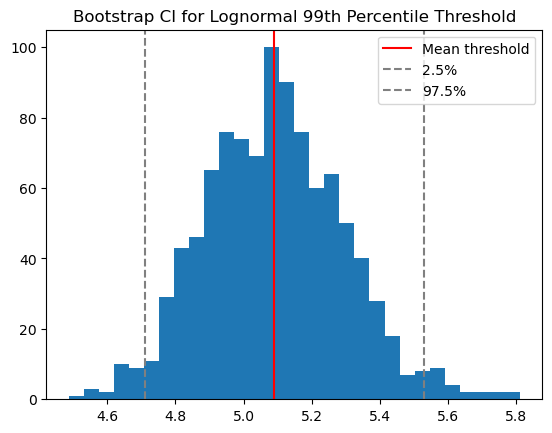

In [9]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

path = "D:\Dissertation-2542000\RP3\Thermal\Fordo_landsattabledata_updated.xlsx"
df = pd.read_excel(path)

vals = df['diff_from_mean'].dropna().values
vals = vals[vals > 0]

boot_thresh = []
n_iterations = 1000

for _ in range(n_iterations):
    sample = np.random.choice(vals, size=len(vals), replace=True)
    mu = np.mean(np.log(sample))
    sigma = np.std(np.log(sample))
    thresh = stats.lognorm.ppf(0.99, s=sigma, scale=np.exp(mu))
    boot_thresh.append(thresh)

# Confidence interval
ci_lower, ci_upper = np.percentile(boot_thresh, [2.5, 97.5])
print(f"95% CI for 99th percentile threshold: {ci_lower:.2f} – {ci_upper:.2f} °C")

# Plot
plt.hist(boot_thresh, bins=30)
plt.axvline(np.mean(boot_thresh), color='red', label='Mean threshold')
plt.axvline(ci_lower, color='gray', linestyle='--', label='2.5%')
plt.axvline(ci_upper, color='gray', linestyle='--', label='97.5%')
plt.title("Bootstrap CI for Lognormal 99th Percentile Threshold")
plt.legend()
plt.show()


In [ ]:
# !pip install fitter
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions
import scipy.stats as stats



path = "D:\Dissertation-2542000\RP3\Thermal\landsattabledata_updated.xlsx"
df = pd.read_excel(path)
vals = df['diff_from_mean'].values


# f = Fitter(df,
#            distributions= get_common_distributions())
# f.fit()
# lognorm_params = f.fitted_param['lognorm']  # returns (s, loc, scale)

# s, loc, scale = lognorm_params

# # Now compute the 99th percentile using scipy
# percentile_99 = stats.lognorm.ppf(0.99, s=s, loc=loc, scale=scale)

# print("Lognorm 99th percentile:", percentile_99)


log_vals = np.log(vals[vals > 0])  # Only positive values
mean_val = np.mean(vals)
std_val = np.std(vals)
min_val = np.min(vals)
max_val = np.max(vals)
mu = np.mean(log_vals)
sigma = np.std(log_vals)
threshold_99 = np.percentile(vals, 99)
print("Empirical 99th percentile:", threshold_99)


# Now get the 99th percentile from the fitted lognormal
percentile_99 = stats.lognorm.ppf(0.99, s=sigma, scale=np.exp(mu))
print("Lognorm 99th percentile (aligned with MATLAB):", percentile_99)
print("Mean of log values:", mu)
print("Standard deviation of log values:", sigma)
print("Mean of original values:", mean_val)
print("Standard deviation of original values:", std_val)
print("Min of original values:", min_val)
print("Max of original values:", max_val)

Empirical 99th percentile: 15.022462703363637
Lognorm 99th percentile (aligned with MATLAB): 16.874153116752094
Mean of log values: 2.200990407666252
Standard deviation of log values: 0.2685723184958536
Mean of original values: 9.348495897252127
Standard deviation of original values: 2.3737808119740462
Min of original values: 3.9349524662860293
Max of original values: 15.022462703363637


In [ ]:
# MERGE Landsat 8 + 9 RESULTS FOR 2015-2022 
import pandas as pd
# Load all generated CSVs
df8_normal = pd.read_csv('D:/Dissertation-2542000/Fordo_stats8_normal_2015.csv')
df9_normal = pd.read_csv('D:/Dissertation-2542000/Fordo_stats9_normal_2015.csv')
df8_downscale = pd.read_csv('D:/Dissertation-2542000/Fordo_stats8_downscale_2015.csv')
df9_downscale = pd.read_csv('D:/Dissertation-2542000/Fordo_stats9_downscale_2015.csv')

# Standardize column names
df9_normal = df9_normal.rename(columns={'Landsat 9 acquisition date': 'Landsat acquisition date'})
df8_normal = df8_normal.rename(columns={'Landsat 8 acquisition date': 'Landsat acquisition date'})
df9_downscale = df9_downscale.rename(columns={'Landsat 9 acquisition date': 'Landsat acquisition date'})
df8_downscale = df8_downscale.rename(columns={'Landsat 8 acquisition date': 'Landsat acquisition date'})

# Print row counts before merge
print(f"\n Pre-Merge Row Counts:")
print(f"L8 Normal:     {len(df8_normal)}")
print(f"L9 Normal:     {len(df9_normal)}")
print(f"L8 Downscale:  {len(df8_downscale)}")
print(f"L9 Downscale:  {len(df9_downscale)}")

# Concatenate
df_normal_merged = pd.concat([df8_normal, df9_normal], ignore_index=True)
df_downscale_merged = pd.concat([df8_downscale, df9_downscale], ignore_index=True)

print(f"\n Post-Merge Row Counts (Before Deduplication):")
print(f"Normal Combined:     {len(df_normal_merged)}")
print(f"Downscale Combined:  {len(df_downscale_merged)}")

# Drop exact duplicates
df_normal_merged = df_normal_merged.drop_duplicates()
df_downscale_merged = df_downscale_merged.drop_duplicates()

print(f"\n Final Row Counts (After Deduplication):")
print(f"Normal Merged:     {len(df_normal_merged)}")
print(f"Downscale Merged:  {len(df_downscale_merged)}")

# Sort by date
df_normal_merged['Landsat acquisition date'] = pd.to_datetime(df_normal_merged['Landsat acquisition date'])
df_downscale_merged['Landsat acquisition date'] = pd.to_datetime(df_downscale_merged['Landsat acquisition date'])
df_normal_merged = df_normal_merged.sort_values('Landsat acquisition date')
df_downscale_merged = df_downscale_merged.sort_values('Landsat acquisition date')

# Save to new merged files
df_normal_merged.to_csv('Fordo_stats_normal_2015_merged.csv', index=False)
df_downscale_merged.to_csv('Fordo_stats_downscale_2015_merged.csv', index=False)

print("\n Merged files written: stats_normal_2015_merged.csv, stats_downscale_2015_merged.csv")


In [ ]:
#  MERGE Landsat 8 + 9 RESULTS FOR 2023–2025 

# Load 2023+ files
df8_normal_new = pd.read_csv('D:/Dissertation-2542000/Fordo_stats8_normal_2023.csv')
df9_normal_new = pd.read_csv('D:/Dissertation-2542000/Fordo_stats9_normal_2023.csv')
df8_downscale_new = pd.read_csv('D:/Dissertation-2542000/Fordo_stats8_downscale_2023.csv')
df9_downscale_new = pd.read_csv('D:/Dissertation-2542000/Fordo_stats9_downscale_2023.csv')

# Standardize columns
df9_normal_new = df9_normal_new.rename(columns={'Landsat 9 acquisition date': 'Landsat acquisition date'})
df8_normal_new = df8_normal_new.rename(columns={'Landsat 8 acquisition date': 'Landsat acquisition date'})
df9_downscale_new = df9_downscale_new.rename(columns={'Landsat 9 acquisition date': 'Landsat acquisition date'})
df8_downscale_new = df8_downscale_new.rename(columns={'Landsat 8 acquisition date': 'Landsat acquisition date'})

# Print row counts before merge
print(f"\n Pre-Merge Row Counts (2023–2025):")
print(f"L8 Normal:     {len(df8_normal_new)}")
print(f"L9 Normal:     {len(df9_normal_new)}")
print(f"L8 Downscale:  {len(df8_downscale_new)}")
print(f"L9 Downscale:  {len(df9_downscale_new)}")

# Concatenate
df_normal_2023 = pd.concat([df8_normal_new, df9_normal_new], ignore_index=True)
df_downscale_2023 = pd.concat([df8_downscale_new, df9_downscale_new], ignore_index=True)

print(f"\n  Post-Merge Row Counts (Before Deduplication):")
print(f"Normal Combined:     {len(df_normal_2023)}")
print(f"Downscale Combined:  {len(df_downscale_2023)}")

# Drop exact duplicates
df_normal_2023 = df_normal_2023.drop_duplicates()
df_downscale_2023 = df_downscale_2023.drop_duplicates()

print(f"\n Final Row Counts (After Deduplication):")
print(f"Normal Merged:     {len(df_normal_2023)}")
print(f"Downscale Merged:  {len(df_downscale_2023)}")

# Sort by date
df_normal_2023['Landsat acquisition date'] = pd.to_datetime(df_normal_2023['Landsat acquisition date'])
df_downscale_2023['Landsat acquisition date'] = pd.to_datetime(df_downscale_2023['Landsat acquisition date'])
df_normal_2023 = df_normal_2023.sort_values('Landsat acquisition date')
df_downscale_2023 = df_downscale_2023.sort_values('Landsat acquisition date')

# Save merged files
df_normal_2023.to_csv('Fordo_stats_normal_2023_merged.csv', index=False)
df_downscale_2023.to_csv('Fordo_stats_downscale_2023_merged.csv', index=False)

print("\n Merged files written: stats_normal_2023_merged.csv, stats_downscale_2023_merged.csv")
